In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TGraphPolar
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 1000, 800 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(1,1)

Welcome to JupyROOT 6.26/06


In [2]:
def fderiv(y,t,deriv):
    a = 1.0/3.0
    #Example 1
    #b = 2.0
    #Example 2
    b = -2.0
    deriv[0] = a*y[0]*y[0]*math.exp(b*t)

In [3]:
def yexact(t):
    #Example 1
    #return -6.0/(-7.0+math.exp(2.0*t))
    #Example 2
    return -6.0*math.exp(2*t)/(-5.0*math.exp(2.0*t)-1)

In [4]:
def euler(y,nY,t,tau,deriv):
    F1 = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
    
    fderiv(y,t,F1)
    
    for i in range(0,nY):
        y[i] = y[i] + tau*F1[i]

In [5]:
# y' = 1/3*y^2*e^(2t)

#Example 1
#nStep = 53
#tau = .02
#Example 2
nStep = 53
tau = 0.2

# Everything below this point is calculated.
y0 = 1
yp0 = 0

tlow = 0
thigh = tlow + (nStep-1)*tau
#print(tlow,thigh)

yy = array('d')
tt = array('d')
nexact = 1000
dt = (thigh-tlow)/nexact
for i in range(0,nexact+1):
    texact = tlow + i*dt
    yy.append(yexact(texact))
    tt.append(texact)
#print(yy,tt)

In [6]:
yplot1 = array('d')
yplot2 = array('d')
yplot3 = array('d')
yplot4 = array('d')

y1 = array('d')
y2 = array('d')
y3 = array('d')
y4 = array('d')

tplot1 = array('d')
tplot2 = array('d')
tplot3 = array('d')
tplot4 = array('d')

deriv1 = array('d')
deriv2 = array('d')
deriv3 = array('d')
deriv4 = array('d')

state1 = array('d')
state2 = array('d')
state3 = array('d')
state4 = array('d')

nState = 1

y1.append(y0)
y2.append(y0)
y3.append(y0)
y4.append(y0)

state1.append(y1[0])
state2.append(y2[0])
state3.append(y3[0])
state4.append(y3[0])

for i in range(0,nState):
    deriv1.append(yp0)
    deriv2.append(yp0)
    deriv3.append(yp0)
    deriv4.append(yp0)

In [7]:
def rk2(y,nY,t,tau,deriv):
    F1 = array('d')
    F2 = array('d')
    ytemp = array('d')
    
    for i in range(0,nY):
        F1.append(0.0)
        F2.append(0.0)
        ytemp.append(0.0)
    
    fderiv(y,t,F1)
    
    half_tau = 0.5*tau
    t_half = t + half_tau
    
    for i in range(0,nY):
        ytemp[i]=y[i]+half_tau*F1[i]
        
    fderiv(ytemp,t_half,F2)
        
    for i in range(0,nY):
        y[i] = y[i] + tau*F2[i]

In [8]:
for method in range(1,5):
    time = 0.0
    for iStep in range(0,nStep):
        if (method == 1):
            # Euler Method
            yplot1.append(y1[0])
            tplot1.append(time)
            euler(state1,nState,time,tau,deriv1)
            y1[0] = state1[0]
            time = time + tau
        else:
            if (method == 2):
                # Explicit Midpoint Method
                yplot2.append(y2[0])
                tplot2.append(time)

                euler(state2,nState,time,tau/2.0,deriv2)
                time = time + tau/2.0
                
                yplot2.append(y2[0])
                tplot2.append(time)
                
                euler(state2,nState,time,tau/2.0,deriv2)
                y2[0] = state2[0]
                time = time + tau/2.0
            else:
                if (method == 3):
                    # Implicit Midpoint Method
                    yplot3.append(y3[0])
                    tplot3.append(time)
                
                    yorig = state3[0]
                    euler(state3,nState,time,tau,deriv3)
                    state3[0] = (state3[0]+yorig)/2.0
                    y3[0] = state3[0]
                    time = time + tau/2.0
                    
                    yplot3.append(y3[0])
                    tplot3.append(time)
                    
                    euler(state3,nState,time,tau/2.0,deriv3)
                    y3[0] = state3[0]
                    time = time + tau/2.0
                else:
                    if (method == 4):
                        # Second Order Runge-Kutta Method
                        yplot4.append(y4[0])
                        tplot4.append(time)
                        rk2(state4,nState,time,tau,deriv4)
                        y4[0]=state4[0]
                        time = time + tau

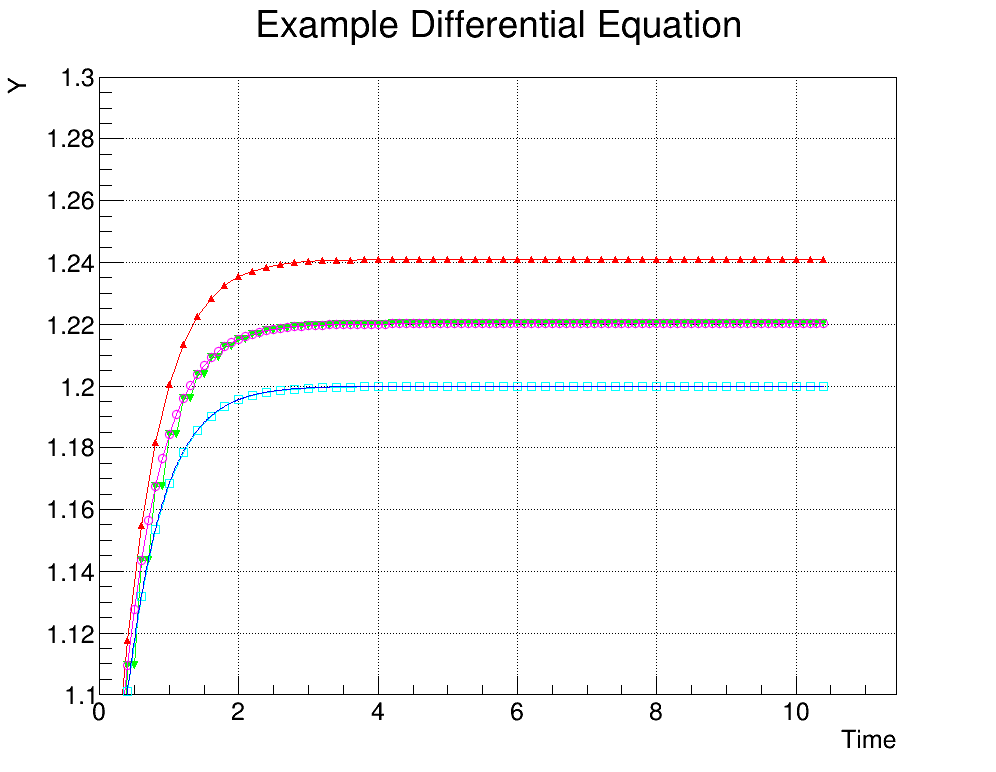

In [9]:
gStyle.SetOptFit(1)
c1.Draw()

gre = TGraph(nStep,tplot1,yplot1)
gre.SetMarkerColor(2)
gre.SetLineColor(2)
gre.SetMarkerStyle(22)

grm = TGraph(2*nStep-1,tplot2,yplot2)
grm.SetMarkerColor(3)
grm.SetLineColor(3)
grm.SetMarkerStyle(23)

gri = TGraph(2*nStep-1,tplot3,yplot3)
gri.SetMarkerColor(6)
gri.SetLineColor(6)
gri.SetMarkerStyle(24)

grr = TGraph(nStep,tplot4,yplot4)
grr.SetMarkerColor(7)
grr.SetLineColor(7)
grr.SetMarkerStyle(25)

grexact = TGraph(nexact+1,tt,yy)
grexact.SetLineColor(4)

c1.cd()
#Example 1
#gre.GetHistogram().SetMaximum(40)
#gre.GetHistogram().SetMinimum(-3)
#Example 2
gre.GetHistogram().SetMaximum(1.3)
gre.GetHistogram().SetMinimum(1.1)
gre.SetTitle("Example Differential Equation")
gre.GetXaxis().SetTitle("Time")
gre.GetYaxis().SetTitle("Y")
gre.Draw("APL")

grm.Draw("PL")
gri.Draw("PL")
grr.Draw("PL")
grexact.Draw("L")

c1.Draw()